<a href="https://colab.research.google.com/github/TotalySpies/Portfolio-for-Data-Analytics/blob/main/Template_Estimation_of_the_Average_Customer_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Multiple linear regression
Власник інтернет-магазину хоче зрозуміти, які фактори впливають на середній чек клієнта (цільова змінна). Для цього можна побудувати багатофакторну лінійну регресійну модель, яка прогнозуватиме середній чек клієнта на основі кількох пояснюючих змінних.
Опис даних:
Цільова змінна ( y ): Середній чек клієнта (грн).
Пояснюючі змінні:
x1 : Кількість товарів у кошику.
x2 : Середня ціна одиниці товару (грн).
x3 : Відсоток знижки, застосованої до замовлення (%).
x4 : Час, проведений на сайті перед оформленням замовлення (хвилини).
Вихідні дані:

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# x1: Number of items in the cart (Items_in_Cart)
num_items = [4, 8, 3, 7, 2, 6, 1, 5, 9, 2, 8, 4, 7, 3, 6, 2, 5, 9, 1, 4,
             7, 6, 3, 8, 2, 5, 4, 9, 7, 2, 6, 3, 8, 5, 1, 7, 9, 4, 6, 2]

# x2: Average price per item in the cart (in UAH) (Average_Item_Price)
avg_price = [150.8, 230.5, 175.2, 310.1, 200.0, 320.4, 120.5, 270.6, 450.2, 210.7,
             180.5, 350.1, 290.3, 410.5, 250.8, 280.7, 300.5, 490.1, 130.2, 260.5,
             340.8, 220.1, 170.5, 310.3, 180.6, 260.4, 300.9, 420.7, 290.5, 200.1,
             310.6, 150.5, 370.2, 280.5, 180.1, 400.7, 430.6, 270.5, 320.2, 150.6]

# x3: Discount percentage applied to the order (Discount_Percentage)
discount = [5.0, 10.5, 15.0, 8.5, 12.0, 20.0, 7.0, 14.0, 25.0, 6.5,
            9.0, 11.5, 22.0, 18.0, 10.0, 5.5, 16.0, 24.0, 13.0, 8.0,
            15.5, 17.0, 9.5, 19.0, 21.0, 7.5, 14.5, 25.0, 11.0, 10.0,
            20.5, 6.0, 13.5, 18.5, 8.5, 22.5, 24.5, 12.5, 14.0, 10.5]

# x4: Time spent on the website before placing the order (in minutes) (Time_on_Site)
time_spent = [25.0, 35.5, 28.0, 40.5, 22.0, 50.0, 18.5, 33.0, 48.5, 30.0,
              27.5, 38.0, 44.5, 39.0, 31.5, 29.0, 34.5, 49.0, 24.0, 32.0,
              37.5, 41.0, 26.0, 42.5, 23.5, 36.0, 30.5, 47.0, 29.5, 34.0,
              40.0, 28.5, 39.5, 43.0, 25.5, 45.5, 46.5, 30.0, 33.5, 27.0]

# y: Average order value (in UAH) (Average_Check)
avg_order = [950, 1780, 1120, 2250, 870, 2000, 650, 1600, 3200, 1050,
             1250, 2500, 2100, 2800, 1800, 1650, 1900, 3400, 750, 1550,
             2300, 1850, 1150, 2400, 890, 1700, 1950, 3100, 2200, 1450,
             2000, 950, 2500, 1750, 1250, 2850, 3300, 1550, 2100, 950]

data = pd.DataFrame({'avg_order': avg_order,
                     'num_items': num_items,
                     'avg_price': avg_price,
                     'discount': discount,
                     'time_spent': time_spent
                     })

In [ ]:
#GET DATA
X=data[["num_items","avg_price","discount","time_spent"]]
y=data["avg_order"]
#SPLIT DATA TRAIN AND TEST
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
#MODEL TRAINING Навчи модель лінійної регресії на тренувальних даних.
model = LinearRegression()
model.fit(X_train,y_train)
#PREDICTION/ Передбачування для тестових даних
y_pred=model.predict(X_test)

print("Tran data:\n",y_train.index)
print("Test data:\n",y_test.index)



Tran data:
 Index([39,  6, 25,  9, 13, 31, 34,  8, 17, 24,  0, 33,  5, 11,  1, 29, 21,  2,
       30, 36,  3, 35, 23, 32, 10, 22, 18, 20,  7, 14, 28, 38],
      dtype='int64')
Test data:
 Index([19, 16, 15, 26, 4, 12, 37, 27], dtype='int64')


In [ ]:
#Metrics/Метрики
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:",r2)

MAE: 150.9396884220765
MSE: 31863.056549027806
RMSE: 178.50225922667704
R2: 0.9094731216783147


MAE 150.9 = 151 = що середня помилка у чеку 151 гривня, що не погано при чеку 1500-2000грн
R2 = 90% = озночає що модель адекватно влювлює модель даних

In [ ]:
#CROSS VALIDATION/ КРОС ВАЛІДАЦІЯ
#MAE
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print("Cross-validation MAE scores:", scores)
print("Mean cross-validation MAE score:", scores.mean())

#MSE
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
print("Cross-validation MSE scores:", scores)
print("Mean cross-validation MSE score:", scores.mean())

#R2
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Cross-validation R2 scores:", scores)
print("Mean cross-validation R2 score:", scores.mean())

Cross-validation MAE scores: [-129.2032032  -166.2782     -156.15597443 -119.08749059 -147.72852745]
Mean cross-validation MAE score: -143.6906791344169
Cross-validation MSE scores: [-32264.99282812 -45261.98868683 -29895.42622989 -20501.46456629
 -27028.53733588]
Mean cross-validation MSE score: -30990.48192940081
Cross-validation R2 scores: [0.89205197 0.90838089 0.94877357 0.95434481 0.9529395 ]
Mean cross-validation R2 score: 0.9312981450611307


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print("Коефіцієнти:")
print(coefficients)
print("\nПеретин з віссю (intercept):", intercept)

Коефіцієнти:
num_items     39.671287
avg_price      6.634942
discount      -3.731778
time_spent     4.029648
dtype: float64

Перетин з віссю (intercept): -243.63791103103904


CONCLUSIONS ON METRICS/ ВИСНОВКИ ПО МЕТРИКАМ
Модель лінійної регресії показала високий рівень точності на тестових даних (R² = 0.91) та стабільність на крос-валідації (середній R² = 0.93).
Аналіз коефіцієнтів показав, що найбільший позитивний вплив на середній чек має кількість товарів у кошику та середня ціна за товар.
Натомість, збільшення розміру знижки має негативний вплив на чек.
Час, проведений на сайті, також позитивно корелює з обсягом покупки.


In [ ]:
from sklearn.preprocessing import StandardScaler

# standartization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-0.40160966 -1.32073991 -1.53909585 -1.17997941]
 [ 1.20482899 -0.46330521 -0.60244001  0.10227506]
 [-0.80321933 -1.05823794  0.16391477 -0.81362099]
 [ 0.80321933  0.39305366 -0.94304213  0.71287243]
 [-1.20482899 -0.79143267 -0.34698841 -1.54633783]
 [ 0.40160966  0.50386392  1.01542008  1.87300742]
 [-1.60643866 -1.64671571 -1.19849372 -1.97375599]
 [ 0.         -0.03189829 -0.00638629 -0.20302362]
 [ 1.60643866  1.9002883   1.86692539  1.68982821]
 [-1.20482899 -0.6763191  -1.28364425 -0.56938204]
 [ 1.20482899 -1.00121907 -0.8578916  -0.87468073]
 [-0.40160966  0.82338475 -0.43213894  0.40757374]
 [ 0.80321933  0.18003977  1.3560222   1.20135032]
 [-0.80321933  1.4731847   0.67481796  0.52969322]
 [ 0.40160966 -0.24491218 -0.68759054 -0.38620283]
 [-1.20482899  0.07676031 -1.45394531 -0.69150152]
 [ 0.          0.2897742   0.33421583 -0.01984441]
 [ 1.60643866  2.32954356  1.69662433  1.75088795]
 [-1.60643866 -1.54236042 -0.17668735 -1.30209888]
 [-0.40160966 -0.14055689 -1.02

In [ ]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2024)

# model training
model = LinearRegression()
model.fit(X_train, y_train)

# making prediction
y_pred = model.predict(X_test)

# get coefficients
print("coefficients:", model.coef_)

coefficients: [120.19143573 649.14086071 -13.5531571  -15.39213751]


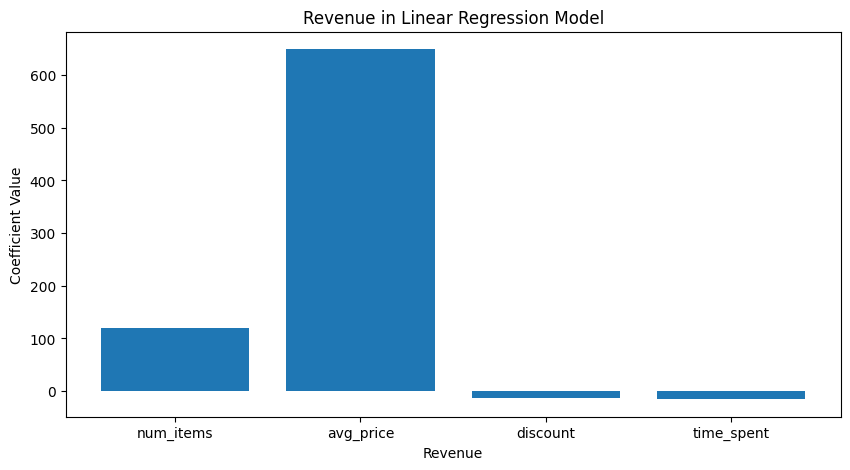

In [ ]:
import matplotlib.pyplot as plt

data = model.coef_

plt.figure(figsize=(10, 5))
plt.bar(range(len(data)), data,
        tick_label=["num_items","avg_price","discount","time_spent"])
plt.title("Revenue in Linear Regression Model")
plt.xlabel("Revenue")
plt.ylabel("Coefficient Value")
plt.show()

In [ ]:
X.corr()

,num_items,avg_price,discount,time_spent
num_items,1.000000,0.711856,0.566820,0.763866
avg_price,0.711856,1.000000,0.690811,0.835995
discount,0.566820,0.690811,1.000000,0.729461
time_spent,0.763866,0.835995,0.729461,1.000000


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train basic model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# evaluate basic model
y_pred_linreg = lin_reg.predict(X_test)
print("MSE (Linear model without regularization):", mean_squared_error(y_test, y_pred_linreg))
print("R2 (Linear model without regularization):", r2_score(y_test, y_pred_linreg))

# train Ridge model
ridge = Ridge()
ridge.fit(X_train, y_train)

# evaluate Ridge model
y_pred_ridge = ridge.predict(X_test)
print("MSE (Ridge model):", mean_squared_error(y_test, y_pred_ridge))
print("R2 (Ridge model):", r2_score(y_test, y_pred_ridge))

# train Lasso model
lasso = Lasso()
lasso.fit(X_train, y_train)

# evaluate Lasso model
y_pred_lasso = lasso.predict(X_test)
print("MSE (Lasso model):", mean_squared_error(y_test, y_pred_lasso))
print("R2 (Lasso model):", r2_score(y_test, y_pred_lasso))

MSE (Linear model without regularization): 31863.056549027806
R2 (Linear model without regularization): 0.9094731216783147
MSE (Ridge model): 31990.421130390576
R2 (Ridge model): 0.9091112631748225
MSE (Lasso model): 31997.742728242767
R2 (Lasso model): 0.9090904616112039


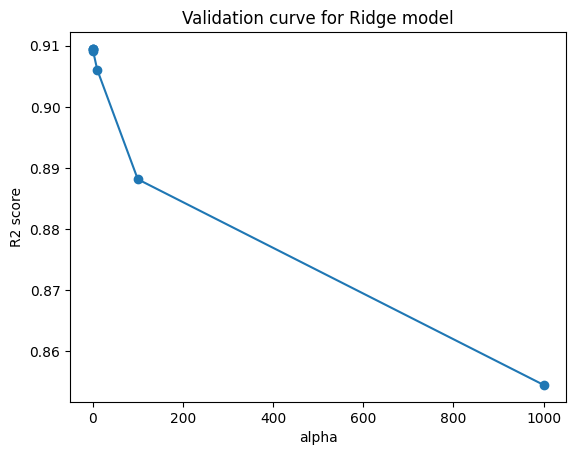

In [ ]:
# hyperparameter tuning in Ridge model
possible_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
r2_scores = []
for alpha in possible_alpha:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  y_pred_ridge = ridge.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred_ridge))

# plot validation curve
plt.plot(possible_alpha, r2_scores, marker="o")
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Validation curve for Ridge model")
plt.show()

In [ ]:
#when find the best "alpha"
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)
#evalucate optimal Ridge model
y_pred_ridge-ridge.predict(X_test)
print("MSE(Ridge model:)",mean_squared_error(y_test,y_pred_ridge))
print("R2(Ridge model:)",r2_score(y_test,y_pred_ridge))

MSE(Ridge model:) 51201.61527946954
R2(Ridge model:) 0.8545298882689989


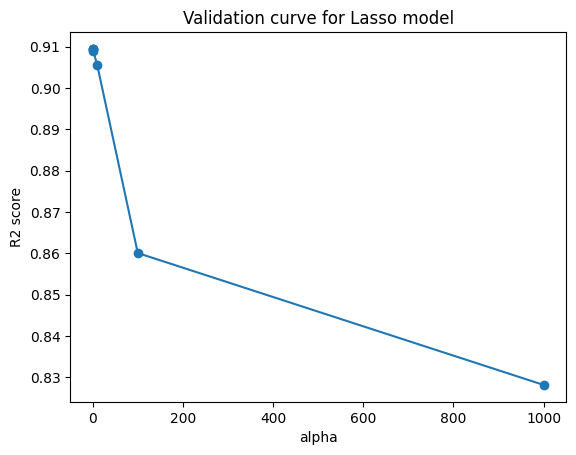

In [ ]:
# hyperparameter tuning in Lasso model
possible_alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
r2_scores = []
for alpha in possible_alpha:
  lasso = Lasso(alpha=alpha)
  lasso.fit(X_train, y_train)
  y_pred_lasso = lasso.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred_lasso))

# plot validation curve
plt.plot(possible_alpha, r2_scores, marker="o")
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Validation curve for Lasso model")
plt.show()

In [ ]:
print("r2 scores:", r2_scores)
print("possible alpha:", possible_alpha)

r2 scores: [0.9094727428333649, 0.9094693332137158, 0.909435168832309, 0.9090904616112039, 0.9055996780357902, 0.8600883606423331, 0.8281813480782125]
possible alpha: [0.001, 0.01, 0.1, 1, 10, 100, 1000]


In [ ]:
#when find the best "alpha"
lasso= Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
#evalucate optimal Lasso model
y_pred_lasso-lasso.predict(X_test)
print("MSE(Lasso model:)",mean_squared_error(y_test,y_pred_lasso))
print("R2(Lasso model:)",r2_score(y_test,y_pred_lasso))

MSE(Lasso model:) 60475.60154352752
R2(Lasso model:) 0.8281813480782125
